In [1]:
#import all modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as td
from datetime import timedelta

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
from statsmodels.tsa.api import Holt

In [2]:
#reading the data
covid = pd.read_csv('C:/Users/hp/Desktop/DATA SCIENCE/STRATH/FINAL PROJECT/DATA/covid_19_data.csv')

In [3]:
covid.head(3)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,1/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,2,1/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,3,1/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0


In [4]:
#descriptive statistics
covid.describe()

,SNo,Confirmed,Deaths,Recovered
count,18327.000000,18327.000000,18327.000000,18327.000000
mean,9164.000000,3030.015551,180.680417,764.542424
std,5290.693527,15129.079515,1362.099905,5618.658958
min,1.000000,0.000000,0.000000,0.000000
25%,4582.500000,9.000000,0.000000,0.000000
50%,9164.000000,101.000000,1.000000,2.000000
75%,13745.500000,674.500000,8.000000,71.000000
max,18327.000000,271590.000000,25969.000000,109800.000000


In [5]:
covid.shape

(18327, 8)

In [6]:
covid.isnull().sum()

SNo                   0
ObservationDate       0
Province/State     9277
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [7]:
covid.drop('SNo',axis=1,inplace=True)

In [8]:
#convert observation date to datetime format
covid['ObservationDate'] = pd.to_datetime(covid['ObservationDate'])
#group cases per the date
by_date = covid.groupby(['ObservationDate']).agg({'Confirmed':'sum','Recovered':'sum','Deaths':'sum'})

In [9]:
#see the number of each case
confirmed = by_date['Confirmed'].iloc[-1]
recovered = by_date['Recovered'].iloc[-1]
deaths = by_date['Deaths'].iloc[-1]
active = by_date['Confirmed'].iloc[-1]-by_date['Recovered'].iloc[-1]-by_date['Deaths'].iloc[-1]

print('Confirmed cases:',confirmed)
print('Recovered cases:',recovered)
print('Deaths:',deaths)
print('Active cases:',active)

Confirmed cases: 2811193
Recovered cases: 793601
Deaths: 197159
Active cases: 1820433


VISUALISATIONS

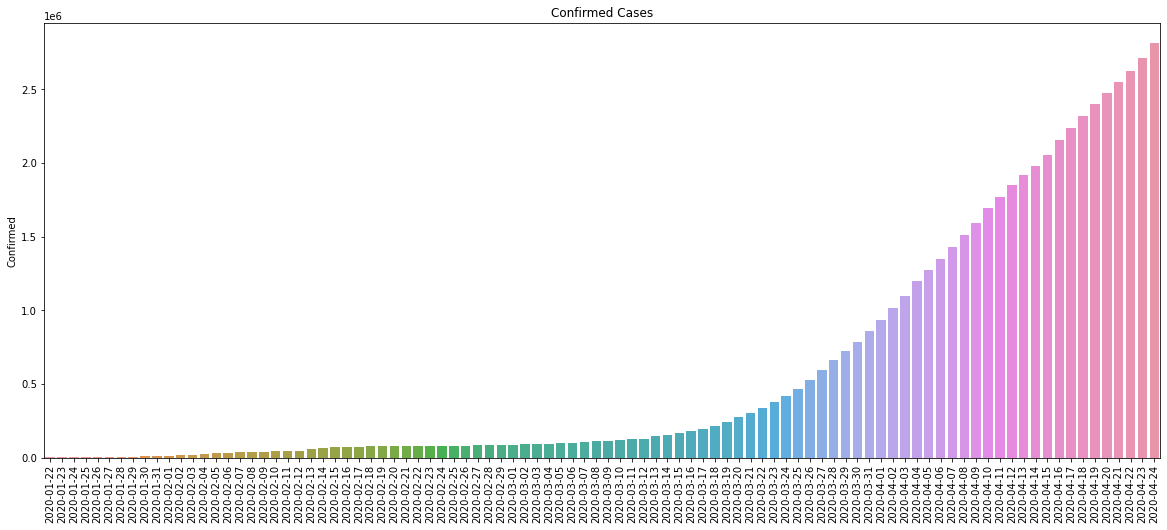

In [12]:
#confirmed cases
plt.figure(figsize=(20,8))
sns.barplot(x=by_date.index.date, y=by_date['Confirmed'])
plt.title('Confirmed Cases')
plt.xticks(rotation = 90)

plt.show()

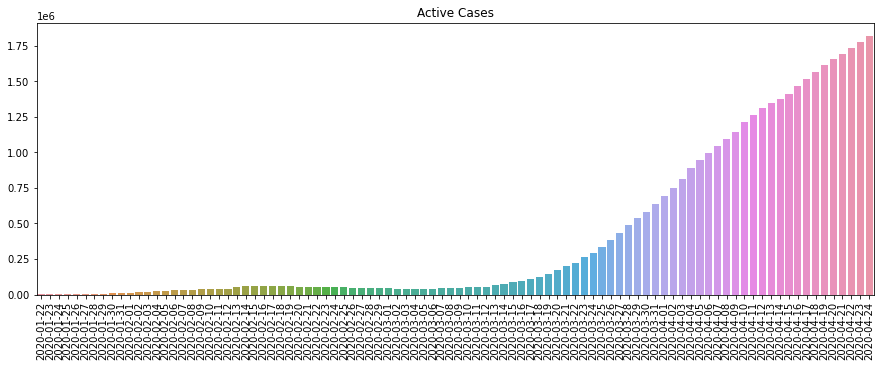

In [13]:
#Active cases
plt.figure(figsize=(15,5))
sns.barplot(x=by_date.index.date, y=by_date['Confirmed']-by_date['Recovered']-by_date['Deaths'])
plt.title('Active Cases')
plt.xticks(rotation=90)

plt.show()

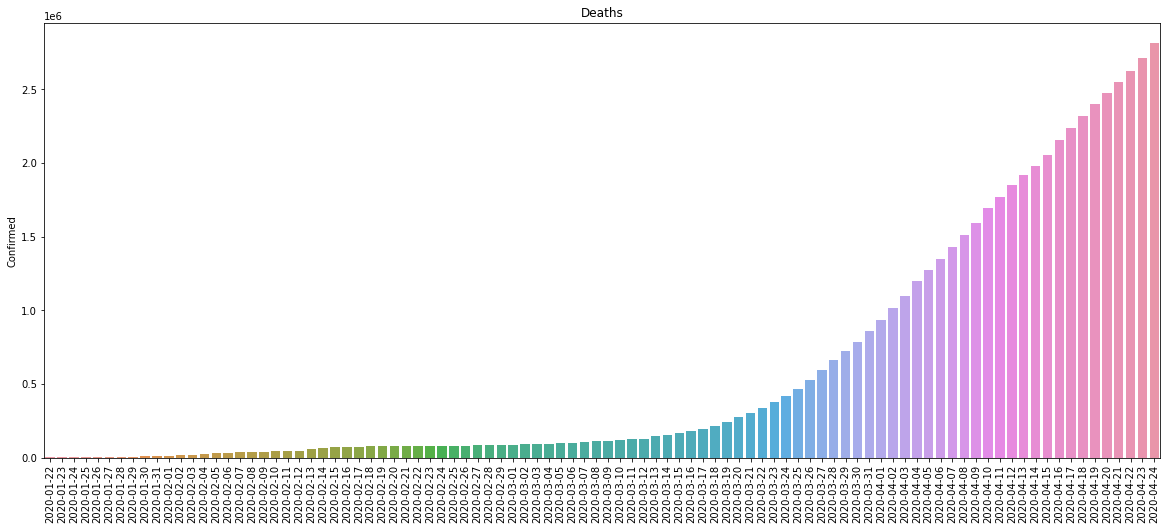

In [14]:
#Death cases
plt.figure(figsize=(20,8))
sns.barplot(x=by_date.index.date, y=by_date['Confirmed'])
plt.title('Deaths')
plt.xticks(rotation = 90)

plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_11200\3365537095.py:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  by_date['WeekofYear'] = by_date.index.weekofyear
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


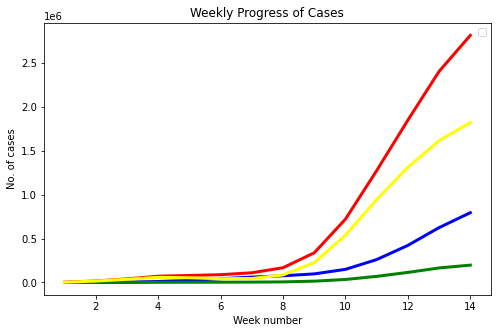

In [15]:
#Weekly Progress of cases
by_date['WeekofYear'] = by_date.index.weekofyear
week_num = []
weekly_confirmed = []
weekly_recovered = []
weekly_deaths = []
weekly_active = []
w = 1
for i in list(by_date['WeekofYear'].unique()):
    weekly_confirmed.append(by_date[by_date['WeekofYear']==i]['Confirmed'].iloc[-1])
    weekly_recovered.append(by_date[by_date['WeekofYear']==i]['Recovered'].iloc[-1])
    weekly_deaths.append(by_date[by_date['WeekofYear']==i]['Deaths'].iloc[-1])
    weekly_active.append(by_date[by_date['WeekofYear']==i]['Confirmed'].iloc[-1]-by_date[by_date['WeekofYear']==i]['Recovered'].iloc[-1]-by_date[by_date['WeekofYear']==i]['Deaths'].iloc[-1])
    week_num.append(w)
    w=w+1
plt.figure(figsize=(8,5))
plt.plot(week_num,weekly_confirmed,linewidth=3,color='red')
plt.plot(week_num,weekly_recovered,linewidth=3,color='blue')
plt.plot(week_num,weekly_deaths,linewidth=3,color='green')
plt.plot(week_num,weekly_active,linewidth=3,color='yellow')


plt.xlabel('Week number')
plt.ylabel('No. of cases')
plt.title('Weekly Progress of Cases')
plt.legend()

plt.show()

Text(0.5, 1.0, 'Weekly Increase in Number of Death Cases')

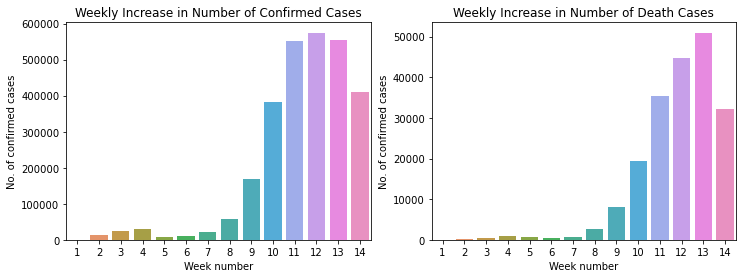

In [16]:
#Weekly increase in cases
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
sns.barplot(x=week_num,y=pd.Series(weekly_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x=week_num,y=pd.Series(weekly_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel('Week number')
ax2.set_xlabel('Week number')
ax1.set_ylabel('No. of confirmed cases')
ax2.set_ylabel('No. of confirmed cases')
ax1.set_title('Weekly Increase in Number of Confirmed Cases')
ax2.set_title('Weekly Increase in Number of Death Cases')

In [17]:
#average increase in number of confirmed cases everyday
c = by_date['Confirmed'].diff().fillna(0)
avg_confirmed = np.round(c.mean())

#average increase in number of recovered cases everyday
r = by_date['Recovered'].diff().fillna(0)
avg_recovered = np.round(r.mean())

#average increase in number of deaths everyday
d = by_date['Deaths'].diff().fillna(0)
avg_deaths = np.round(d.mean())
 

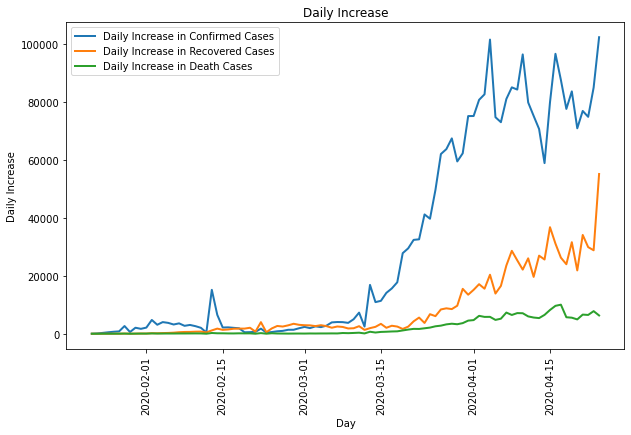

In [18]:
plt.figure(figsize=(10,6))
plt.plot(c,label='Daily Increase in Confirmed Cases',linewidth=2)
plt.plot(r,label='Daily Increase in Recovered Cases',linewidth=2)
plt.plot(d,label='Daily Increase in Death Cases',linewidth=2)
plt.ylabel('Daily Increase')
plt.xlabel('Day')
plt.title('Daily Increase')

plt.legend()
plt.xticks(rotation = 90)
plt.show()

In [19]:
# Analysis per country
country = covid[covid['ObservationDate']==covid['ObservationDate'].max()].groupby('Country/Region').agg({'Confirmed':'sum','Recovered':'sum','Deaths':'sum'}).sort_values(['Confirmed'],ascending=False)

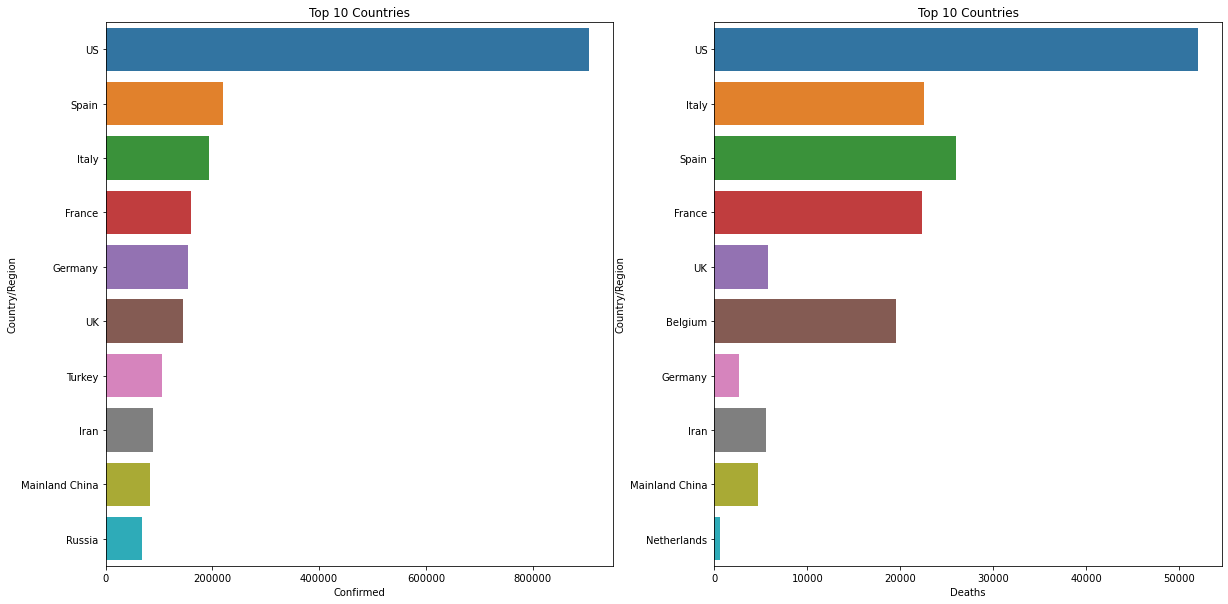

In [20]:
#top 10 countries
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
top10_confirmed = country.sort_values(['Confirmed'],ascending=False).head(10)
top10_deaths = country.sort_values(['Deaths'],ascending=False).head(10)

sns.barplot(x=top10_confirmed['Confirmed'], y=top10_confirmed.index,ax=ax1)
ax1.set_title('Top 10 Countries')

sns.barplot(x=top10_confirmed['Deaths'], y=top10_deaths.index,ax=ax2)
ax2.set_title('Top 10 Countries')

plt.show()

FITTING AND PREDICTION

In [21]:
#Append days column
#subtract first day to change to days
by_date['Days']=by_date.index-by_date.index[0]

#convert to days
by_date['Days']=by_date['Days'].dt.days


In [22]:
#split the data
#training data:25%
train = by_date.iloc[:int(by_date.shape[0]*0.70)]
#test data:75%
test = by_date.iloc[:int(by_date.shape[0]*0.30)]

X_train = np.array(train['Days']).reshape(-1,1)
Y_train= np.array(train['Confirmed']).reshape(-1,1)

X_test = np.array(test['Days']).reshape(-1,1)
Y_test = np.array(test['Days']).reshape(-1,1)

In [23]:
Y_train.shape

(65, 1)

In [24]:
#LINEAR REGRESSION
#fitting
reg = LinearRegression()
reg.fit(X_train,Y_train)

reg_pred = reg.predict(np.array(train['Days'].max()+i).reshape(-1,1))

In [25]:
#Support Vector Regression
svm = SVR()
svm.fit(X_train,Y_train) 

svm_pred = svm.predict(np.array(train['Days'].max()+i).reshape(-1,1))

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
'''new_date = []
new_reg_pred = []
new_svm_pred = []
for i in range(1,18):
    new_date.append(case_date.index[-1]+timedelta(days=i))
    new_reg_pred.append(reg.predict(np.array(train['Days'].max()+i).reshape(-1,1))[0][0])
    new_svm_pred.append(svm.predict(np.array(train['Days'].max()+i).reshape(-1,1))[0])
pd.set_option('display.float_format',lambda x:'%.f'%x)
predictions=pd.DataFrame(zip(new_date,new_reg_pred,new_svm_pred),columns = ['Dates','Linear Regression','SVR'])
predictions.head()'''

"new_date = []\nnew_reg_pred = []\nnew_svm_pred = []\nfor i in range(1,18):\n    new_date.append(case_date.index[-1]+timedelta(days=i))\n    new_reg_pred.append(reg.predict(np.array(train['Days'].max()+i).reshape(-1,1))[0][0])\n    new_svm_pred.append(svm.predict(np.array(train['Days'].max()+i).reshape(-1,1))[0])\npd.set_option('display.float_format',lambda x:'%.f'%x)\npredictions=pd.DataFrame(zip(new_date,new_reg_pred,new_svm_pred),columns = ['Dates','Linear Regression','SVR'])\npredictions.head()"

In [31]:
start_date = by_date.index[0]
new_date = []
new_reg_pred = []
new_svm_pred = []
for i in range(0,65):
    new_date.append(start_date+timedelta(days=i))
    new_reg_pred.append(reg.predict(np.array(train['Days'].max()+i).reshape(-1,1))[0][0])
    new_svm_pred.append(svm.predict(np.array(train['Days'].max()+i).reshape(-1,1))[0])
pd.set_option('display.float_format',lambda x:'%.f'%x)
predictions=pd.DataFrame(zip(new_date,new_reg_pred,new_svm_pred),columns = ['Dates','Linear Regression','SVR'])


In [32]:
Y_pred = predictions['Linear Regression']

In [33]:
Y_pred.shape

(65,)

 R2 Score, MSE (Mean Squared Error), RMSE (Root Mean Squared Error

In [34]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_train, Y_pred)

109946466626.86629

In [35]:
from sklearn.metrics import r2_score
r2_score(Y_train, Y_pred)

-7.458040957876127

<AxesSubplot:xlabel='Confirmed'>

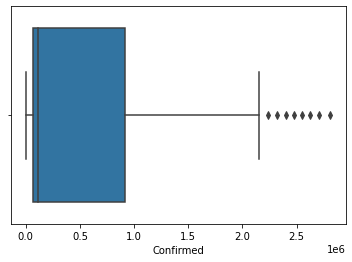

In [36]:
sns.boxplot(x=by_date["Confirmed"])

In [37]:
#Using our boxplot, see the lower/upper quartile limits 

def outliers(by_date, feature):
    Q1= by_date[feature].quantile(0.25)
    Q3 = by_date[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit
upper, lower = outliers(by_date, "Confirmed")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

Upper whisker:  2183428.875
Lower Whisker:  -1202180.125


In [38]:
#The outliers are:
by_date[(by_date['Confirmed'] < lower) | (by_date['Confirmed'] > upper)]

,Confirmed,Recovered,Deaths,WeekofYear,Days
ObservationDate,,,,,
2020-04-17,2240191,568343,153822,16,86
2020-04-18,2317759,592319,159510,16,87
2020-04-19,2401379,623903,165044,16,88
2020-04-20,2472259,645738,169986,17,89
2020-04-21,2549123,679819,176583,17,90
2020-04-22,2623960,709694,183066,17,91
2020-04-23,2708885,738486,190858,17,92
2020-04-24,2811193,793601,197159,17,93


In [39]:
#Remove outliers
by_date=by_date[(by_date['Confirmed']>lower)&(by_date['Confirmed']<upper)]

In [40]:
by_date.shape

(86, 5)

RE-FITTING AFTER REMOVING OUTLIERS

In [41]:
#Append days column
#subtract first day to change to days
by_date['Days']=by_date.index-by_date.index[0]

#convert to days
by_date['Days']=by_date['Days'].dt.days

In [43]:
#split the data
#training data:25%
train = by_date.iloc[:int(by_date.shape[0]*0.80)]
#test data:75%
test = by_date.iloc[:int(by_date.shape[0]*0.20)]

X_train = np.array(train['Days']).reshape(-1,1)
Y_train= np.array(train['Confirmed']).reshape(-1,1)

X_test = np.array(test['Days']).reshape(-1,1)
Y_test = np.array(test['Days']).reshape(-1,1)

In [47]:
train.shape

(68, 5)

In [44]:
#LINEAR REGRESSION
#fitting
reg = LinearRegression()
reg.fit(X_train,Y_train)

reg_pred = reg.predict(np.array(train['Days'].max()+i).reshape(-1,1))

In [45]:
#Support Vector Regression
svm = SVR()
svm.fit(X_train,Y_train) 

svm_pred = svm.predict(np.array(train['Days'].max()+i).reshape(-1,1))

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
start_date = by_date.index[0]
new_date = []
new_reg_pred = []
new_svm_pred = []
for i in range(0,68):
    new_date.append(start_date+timedelta(days=i))
    new_reg_pred.append(reg.predict(np.array(train['Days'].max()+i).reshape(-1,1))[0][0])
    new_svm_pred.append(svm.predict(np.array(train['Days'].max()+i).reshape(-1,1))[0])
pd.set_option('display.float_format',lambda x:'%.f'%x)
predictions=pd.DataFrame(zip(new_date,new_reg_pred,new_svm_pred),columns = ['Dates','Linear Regression','SVR'])


In [49]:
Y_pred = predictions['Linear Regression']

In [50]:
Y_pred.shape

(68,)

In [51]:
Y_train.shape

(68, 1)

In [52]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_train, Y_pred)

198597251751.52856

In [53]:
from sklearn.metrics import r2_score
r2_score(Y_train, Y_pred)

-6.842469129157009

In [54]:
predictions

,Dates,Linear Regression,SVR
0,2020-01-22,349525,80010
1,2020-01-23,356022,80009
2,2020-01-24,362520,80008
3,2020-01-25,369018,80007
4,2020-01-26,375516,80006
...,...,...,...
63,2020-03-25,758895,79993
64,2020-03-26,765393,79993
65,2020-03-27,771891,79993
66,2020-03-28,778389,79993


In [55]:
by_date

,Confirmed,Recovered,Deaths,WeekofYear,Days
ObservationDate,,,,,
2020-01-22,555,28,17,4,0
2020-01-23,653,30,18,4,1
2020-01-24,941,36,26,4,2
2020-01-25,1438,39,42,4,3
2020-01-26,2118,52,56,4,4
...,...,...,...,...,...
2020-04-12,1846680,421722,114089,15,81
2020-04-13,1917320,448655,119482,16,82
2020-04-14,1976192,474261,125984,16,83


FORECASTING

In [118]:
#splitting data
model_train = by_date.iloc[:int(by_date.shape[0]*0.85)]
model_test = by_date.iloc[int(by_date.shape[0]*0.85):]

In [137]:
model_train.shape

(53, 5)

In [138]:
model_test.shape

(10, 5)

In [128]:
#fitting
holt = Holt(np.asarray(model_train['Confirmed'])).fit(smoothing_level=1.4,smoothing_slope=0.2)
y_pred = model_test.copy()
y_pred['Holt'] = holt.forecast(len(model_test))

C:\Users\hp\AppData\Local\Temp\ipykernel_11048\3200155342.py:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt = Holt(np.asarray(model_train['Confirmed'])).fit(smoothing_level=1.4,smoothing_slope=0.2)


In [136]:
holt_start_date = by_date.index[0]
holt_new_date = []
holt_pred = []

for i in range(0,6):
    holt_new_date.append(holt_start_date+timedelta(days=i))
    holt_pred.append(holt.forecast((len(model_test)+i))[-1])
predictions['Holts Linear Model Prediction'] = holt_pred
predictions.head()

,Dates,Linear Regression,SVR,Holts Linear Model Prediction
0,2020-01-22,2635,1191,224339
1,2020-01-23,3114,1191,231265
2,2020-01-24,3592,1190,238192
3,2020-01-25,4071,1190,245118
4,2020-01-26,4550,1190,252044
